In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2010,1,2.5,9.1,1500
1,2010,2,2.7,8.9,1550
2,2010,3,2.6,8.8,1600
3,2010,4,2.8,8.7,1620
4,2010,5,2.9,8.6,1580


In [3]:
#drop unneccaru=y columns
df.drop(columns=["year", "month"], axis=1, inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.5,9.1,1500
1,2.7,8.9,1550
2,2.6,8.8,1600
3,2.8,8.7,1620
4,2.9,8.6,1580


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

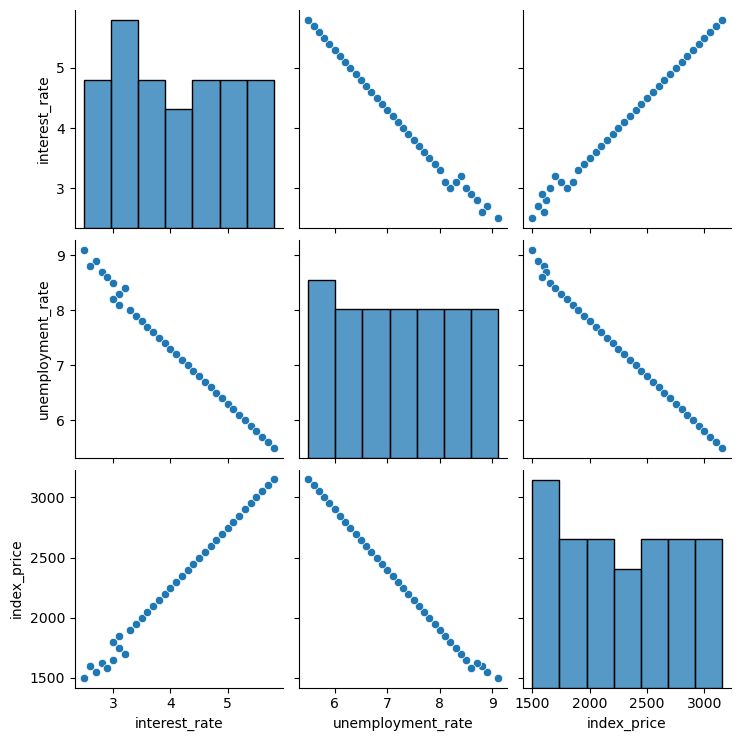

In [6]:
# visualisation
import seaborn as sns
sns.pairplot(df)

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.996641,0.997101
unemployment_rate,-0.996641,1.000000,-0.998261
index_price,0.997101,-0.998261,1.000000


Text(0, 0.5, 'unemployment_rate')

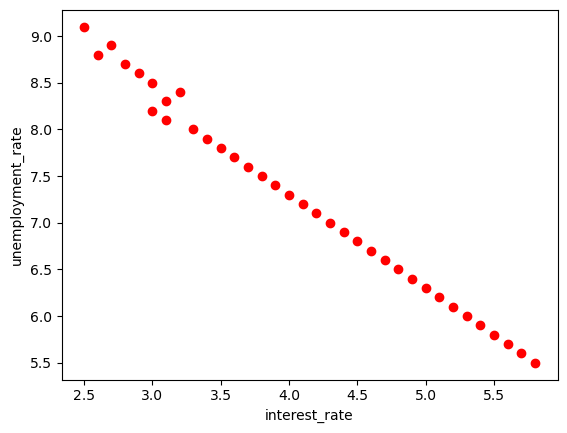

In [11]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [13]:
## independent and dependent feature
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
X.head()

,interest_rate,unemployment_rate
0,2.5,9.1
1,2.7,8.9
2,2.6,8.8
3,2.8,8.7
4,2.9,8.6


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

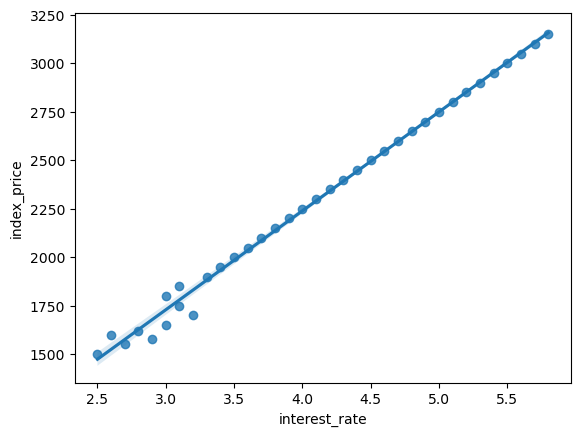

In [23]:
import seaborn as sns
sns.regplot(data=df,x='interest_rate',y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

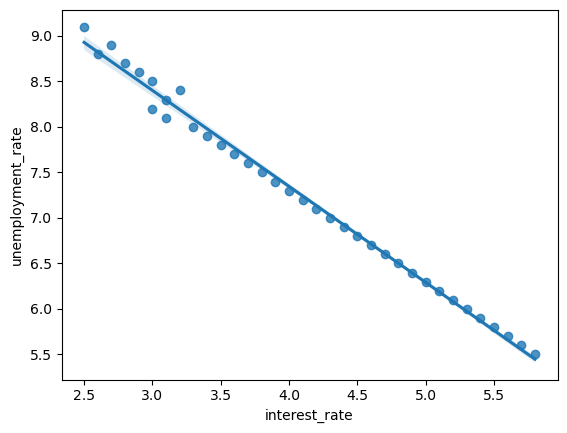

In [24]:
sns.regplot(data=df,x='interest_rate',y='unemployment_rate')

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train

array([[ 0.02264264, -0.07727341],
       [-0.8943842 ,  0.68141101],
       [ 1.75480444, -1.68947781],
       [-1.50573542,  1.62976654],
       [-1.09816794,  1.15558877],
       [ 1.24534509, -1.21530005],
       [-0.1811411 ,  0.11239769],
       [ 0.22642638, -0.26694452],
       [-0.99627607,  1.06075322],
       [-0.58870859,  0.4917399 ],
       [-1.30195168,  1.44009543],
       [ 0.73588573, -0.74112228],
       [-1.40384355,  1.34525988],
       [ 1.65291257, -1.59464226],
       [-1.20005981,  1.25042433],
       [ 1.5510207 , -1.49980671],
       [ 0.63399386, -0.64628673],
       [ 1.04156135, -1.02562894],
       [-0.69060046,  0.58657546],
       [ 0.53210199, -0.55145118],
       [ 0.12453451, -0.17210897],
       [ 0.8377776 , -0.83595784],
       [-0.79249233,  0.96591767],
       [ 0.32831825, -0.36178007],
       [-0.8943842 ,  0.87108211],
       [-0.28303297,  0.20723325],
       [ 1.14345322, -1.12046449]])

In [31]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)


In [35]:
np.mean(validation_score)

-1274.8601807700818

In [36]:
## prediction
y_pred=regression.predict(X_test)
y_pred

array([2984.31112128, 1763.50991443, 2484.89244575, 2706.85630154,
       1929.98280628, 2762.34726549, 2207.43762601, 1708.01895049,
       1469.31023539])

In [38]:
## performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

61630.34604984312
242.59259259259275
248.25459925214503


In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
print(1 - (1 - score) * (len(y_test) - 1) / (len(y_test)-X_test.shape[1]-1))

0.7001766948926551
0.6002355931902068


In [41]:
## assumptions

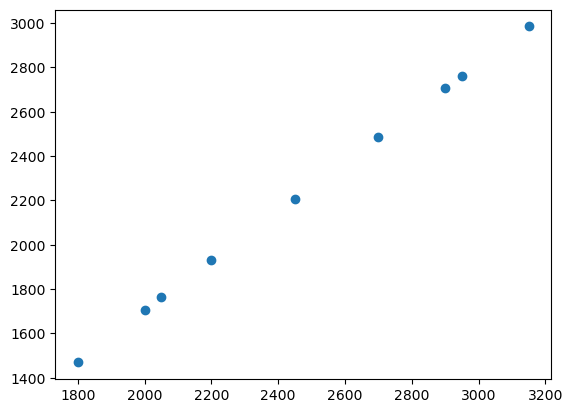

In [42]:
plt.scatter(y_test,y_pred)

In [45]:
residual=y_test-y_pred
print(residual)

35    165.688879
13    286.490086
26    215.107554
30    193.143698
16    270.017194
31    187.652735
21    242.562374
12    291.981050
8     330.689765
Name: index_price, dtype: float64


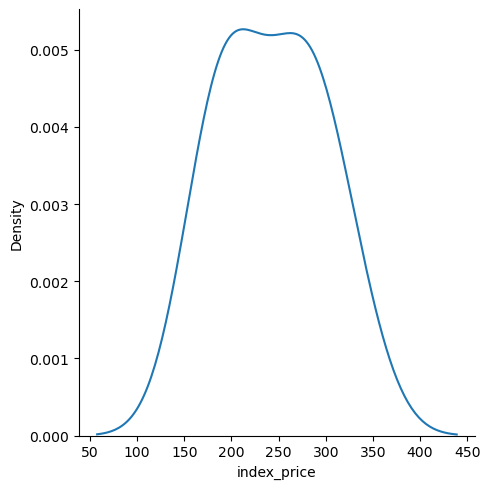

In [46]:
## plot this residuall
sns.displot(residual,kind='kde')

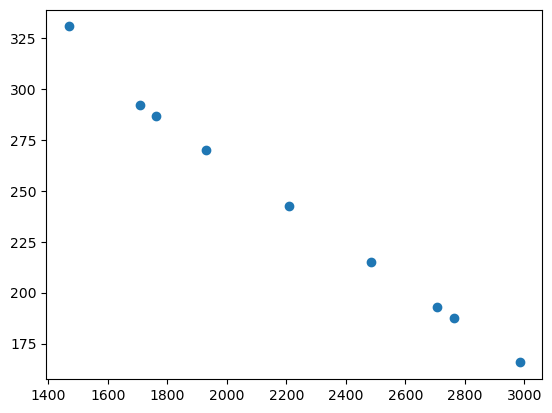

In [47]:
## catter plot with respect to prediction and rediduals
plt.scatter(y_pred,residual)

In [51]:
import statsmodels.api as sm

# Assuming X_train and y_train are your training data
# Add a constant (intercept) to the model
X_train_sm = sm.add_constant(X_train)

# Create an OLS model and fit it to the training data
model = sm.OLS(y_train, X_train_sm).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3325.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           4.68e-30
Time:                        02:09:44   Log-Likelihood:                -130.48
No. Observations:                  27   AIC:                             267.0
Df Residuals:                      24   BIC:                             270.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2224.0741      6.201    358.688      0.0

In [53]:
print(regression.coef_)

[ 154.6376203  -351.33599978]
